# Flowers Dataset

https://www.kaggle.com/datasets/l3llff/flowers

Open and process the images

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns

In [2]:
datadirectory = "C:/Users/ynino/Documents/homeworks/LINEARALGEBRA/FLOWERS/training"
categories = ['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 
              'common_daisy', 'coreopsis', 'daffodil', 'dandelion', 'iris', 'magnolia', 'rose',
              'sunflower', 'tulip', 'water_lily']

In [3]:
img_size = 64

In [4]:
trainingdata = []

def create_training_data():
    for category in categories:
      path = os.path.join(datadirectory, category) #path to types of flowers dir
      class_num = categories.index(category)       #links the index of the categories to the category 
      for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))#, cv2.IMREAD_GRAYSCALE)
        img_resize = cv2.resize(img_array, (img_size, img_size))
        trainingdata.append([img_resize, class_num])
        
create_training_data()


In [5]:
len(trainingdata)

15740

In [6]:
import random 
random.shuffle(trainingdata)
for sample in trainingdata[:16]:
    print(sample[1])

13
8
4
5
15
10
11
3
7
10
10
8
5
13
2
1


In [7]:
X = []   #images data
y = []   #labels of the images

for features, label in trainingdata:  #in training data we have one index to images data and other for its labels
    X.append(features)                #here I separe in x the images data
    y.append(label)                   #and in y the labels

X = np.array(X).reshape(-1, img_size, img_size, 3) #convert in a numpy array

In [8]:
len(X)

15740

In [9]:
X = X.reshape(15740, 12288)

In [10]:
traindf = pd.DataFrame(X)

In [11]:
len(traindf)

15740

# PCA with two components

In [12]:
import random
sample_size = 1574  # Tamaño del subconjunto
sample_indices = random.sample(range(len(X)), sample_size)
train_sample = [X[i] for i in sample_indices]
label_sample = [y[i] for i in sample_indices]

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
train_sample_norm = StandardScaler().fit_transform(train_sample)

In [14]:
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 2
pca_train = pca.fit_transform(train_sample_norm)
pca_train.shape

(1574, 2)

In [15]:
pca_train_labels = np.vstack((pca_train.T, label_sample)).T
pca_result = pd.DataFrame(data=pca_train_labels, columns=("Principal Component 1", "Principal Component 2", "Labels"))

Text(0.5, 1.0, 'PCA with two components')

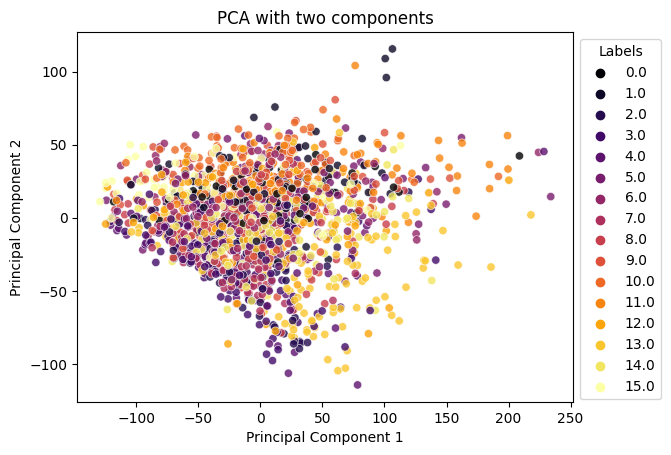

In [16]:
fig1 = sns.scatterplot(data=pca_result, x="Principal Component 1", y="Principal Component 2", 
                hue="Labels", alpha=0.8, legend="full", palette='inferno')
sns.move_legend(fig1, "upper left", bbox_to_anchor=(1, 1))
fig1.set_title('PCA with two components')

Clustering

c:\Users\ynino\Documents\homeworks\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'PCA with two components + K-Means clustering')

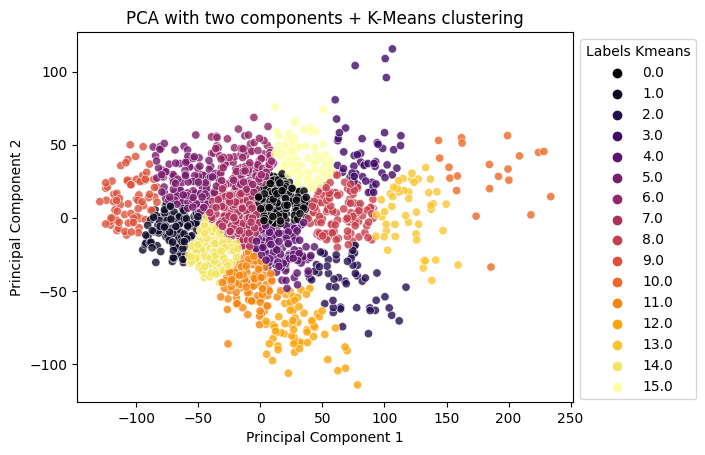

In [17]:
from sklearn.cluster import KMeans

pca_kmeans = pca_train.copy()
kmeans_pca = KMeans(n_clusters=16).fit(pca_kmeans)
kmeans_labels_pca = kmeans_pca.labels_ 

pca_kmeans_labels = np.vstack((pca_kmeans.T, label_sample)).T
pca_kmeans_labels1 = np.vstack((pca_kmeans_labels.T, kmeans_labels_pca)).T
pca_result_kmeans = pd.DataFrame(data=pca_kmeans_labels1, 
                                 columns=("Principal Component 1", "Principal Component 2", 
                                          "Labels Org", "Labels Kmeans"))


fig2 = sns.scatterplot(data=pca_result_kmeans, x="Principal Component 1", y="Principal Component 2", hue= "Labels Kmeans",
                alpha=0.8, legend="full", palette='inferno')
sns.move_legend(fig2, "upper left", bbox_to_anchor=(1, 1))
fig2.set_title('PCA with two components + K-Means clustering')

# MDS with two components

In [18]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
mds_train = mds.fit_transform(train_sample_norm)
mds_train.shape

c:\Users\ynino\Documents\homeworks\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(1574, 2)

In [19]:
mds_train_labels = np.vstack((mds_train.T, label_sample)).T
mds_result = pd.DataFrame(data=mds_train_labels, columns=("Principal Component 1", "Principal Component 2", "Labels"))

Text(0.5, 1.0, 'MDS with two components')

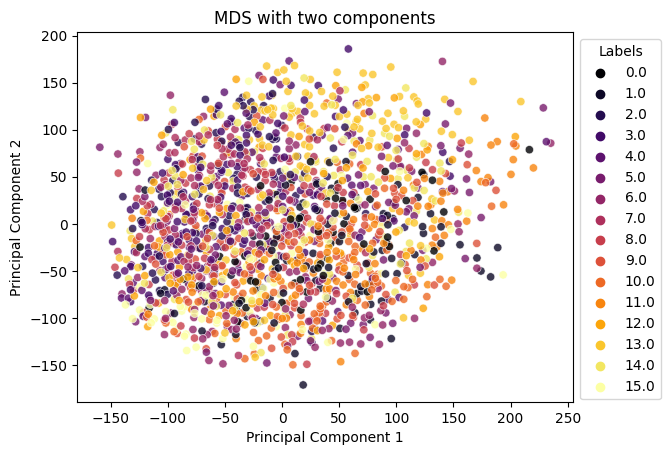

In [20]:
fig3 = sns.scatterplot(data=mds_result, x="Principal Component 1", y="Principal Component 2", 
                hue="Labels", alpha=0.8, legend="full", palette='inferno')
sns.move_legend(fig3, "upper left", bbox_to_anchor=(1, 1))
fig3.set_title('MDS with two components')

Clustering

c:\Users\ynino\Documents\homeworks\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'MDS with two components + K-Means clustering')

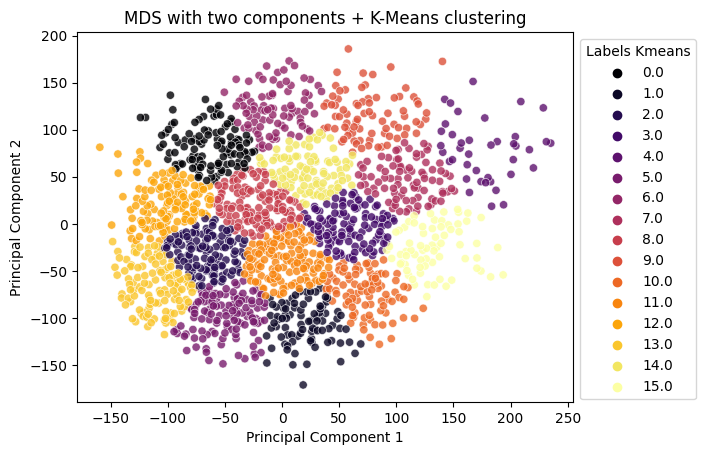

In [21]:
mds_kmeans = mds_train.copy()
kmeans_mds = KMeans(n_clusters=16).fit(mds_kmeans)
kmeans_labels_mds = kmeans_mds.labels_ 

mds_kmeans_labels = np.vstack((mds_kmeans.T, label_sample)).T
mds_kmeans_labels1 = np.vstack((mds_kmeans_labels.T, kmeans_labels_mds)).T
mds_result_kmeans = pd.DataFrame(data=mds_kmeans_labels1, 
                                 columns=("Principal Component 1", "Principal Component 2", 
                                          "Labels Org", "Labels Kmeans"))


fig4 = sns.scatterplot(data=mds_result_kmeans, x="Principal Component 1", y="Principal Component 2", hue= "Labels Kmeans",
                alpha=0.8, legend="full", palette='inferno')
sns.move_legend(fig4, "upper left", bbox_to_anchor=(1, 1))
fig4.set_title('MDS with two components + K-Means clustering')

# tSNE with two components

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_train = tsne.fit_transform(train_sample_norm)
tsne_train.shape

(1574, 2)

In [23]:
tsne_train_labels = np.vstack((tsne_train.T, label_sample)).T
tsne_result = pd.DataFrame(data=tsne_train_labels, columns=("Principal Component 1", "Principal Component 2", "Labels"))

Text(0.5, 1.0, 'tSNE with two components')

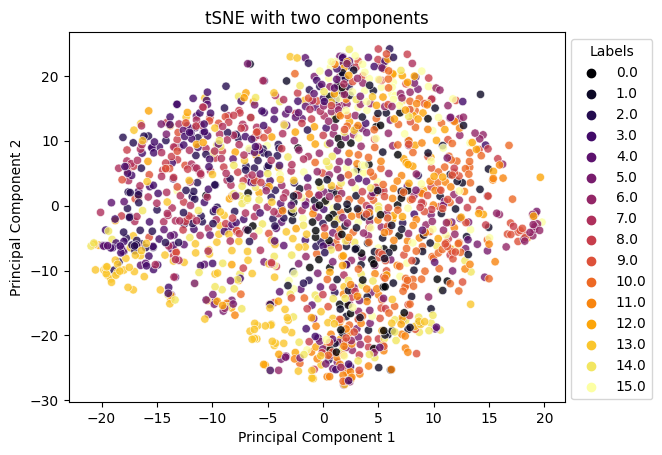

In [24]:
fig5 = sns.scatterplot(data=tsne_result, x="Principal Component 1", y="Principal Component 2", 
                hue="Labels", alpha=0.8, legend="full", palette='inferno')
sns.move_legend(fig5, "upper left", bbox_to_anchor=(1, 1))
fig5.set_title('tSNE with two components')

Clustering

c:\Users\ynino\Documents\homeworks\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'tSNE with two components + K-Means clustering')

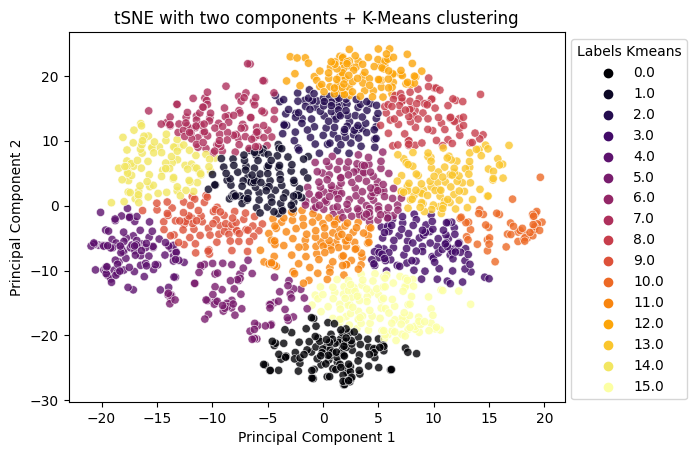

In [25]:
tsne_kmeans = tsne_train.copy()
kmeans_tsne = KMeans(n_clusters=16).fit(tsne_kmeans)
kmeans_labels_tsne = kmeans_tsne.labels_ 

tsne_kmeans_labels = np.vstack((tsne_kmeans.T, label_sample)).T
tsne_kmeans_labels1 = np.vstack((tsne_kmeans_labels.T, kmeans_labels_tsne)).T
tsne_result_kmeans = pd.DataFrame(data=tsne_kmeans_labels1, 
                                 columns=("Principal Component 1", "Principal Component 2", 
                                          "Labels Org", "Labels Kmeans"))


fig6 = sns.scatterplot(data=tsne_result_kmeans, x="Principal Component 1", y="Principal Component 2", hue= "Labels Kmeans",
                alpha=0.8, legend="full", palette='inferno')
sns.move_legend(fig6, "upper left", bbox_to_anchor=(1, 1))
fig6.set_title('tSNE with two components + K-Means clustering')

In [26]:
tsne_result_kmeans['Labels Org'].value_counts()

13.0    126
9.0     123
3.0     109
6.0     104
8.0     102
7.0     101
11.0    101
10.0    100
14.0    100
12.0     99
2.0      96
15.0     91
1.0      90
5.0      86
4.0      85
0.0      61
Name: Labels Org, dtype: int64

In [27]:
labelsdist = tsne_result_kmeans.groupby('Labels Kmeans')['Labels Org'].value_counts()